In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

The code above imports necessary libraries such as pandas, numpy, matplotlib, and seaborn for data manipulation, numerical operations, data visualization, and statistical analysis, for which we will go into depth later.

First I found a dataset from Kaggle called: Human Development Index and Components. 

In [2]:
#Reading a CSV file named "Human Development Index and Components.csv" 
#The encoding='latin1' argument specifies the character encoding used in the CSV file.

HDI = pd.read_csv("C:\\Users\\user\\Desktop\\Human Development Index and Components.csv", encoding='latin1')
HDI


,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13,"64,660",6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5
...,...,...,...,...,...,...,...,...,...,...
190,191,South Sudan,LOW,0.385,55.0,5.5,5.7,768,-1,191
191,192,Korea (Democratic People's Rep. of),OTHER,..,73.3,10.8,..,..,..,..
192,193,Monaco,OTHER,..,85.9,..,..,..,..,..
193,194,Nauru,OTHER,..,63.6,11.7,..,"17,730",..,..


The dataset provided contains information on the Human Development Index (HDI) and its various components for different countries. The Human Development Index is a measure that represents the social and economic development of countries based on indicators such as:

1) Life Expectancy at Birth: Average number of years a newborn is expected to live.
2) Expected Years of Schooling: Number of years of formal education a child is expected to receive.
3) Mean Years of Schooling: Average number of years of education received by people aged 25 years and older.
4) Gross National Income (GNI) per Capita: Measure of average income per person in a country.
5) GNI per Capita Rank Minus HDI Rank: Difference between the rank of GNI per capita and the rank of HDI, indicating the disparity between income and human development.
6) HDI Rank: Rank of the country based on the Human Development Index.

The dataset provides insights into the development status of various countries and allows for comparisons and analysis of different indicators related to human development.

In [3]:
#Filtering rows with NaNs in columns

HDI[HDI.isna().any(axis=1)]

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1


The result contains the subset of rows from the original HDI Dataframe that have missing values in at least one column. This can be useful for further analysis or for identifying and handling missing data in the dataset.

In [4]:
# Checking for missing/empty values in the dataset
missing_values = HDI.isnull().sum()

print(missing_values)


HDI rank                                  0
Country                                   0
HUMAN DEVELOPMENT                         0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank.1                                0
dtype: int64


Our dataset does not contain a count of missing values for each column. 

To get a clear picture of the database chosen, we use the following functions, in order to obtain the size of the DataFrame HDI and a summary of the numerical columns.

In [5]:
HDI.shape

(195, 10)

In [6]:
HDI.describe

<bound method NDFrame.describe of      HDI rank                              Country HUMAN DEVELOPMENT  \
0           1                          Switzerland        VERY HIGH    
1           2                               Norway        VERY HIGH    
2           3                              Iceland        VERY HIGH    
3           4               Hong Kong, China (SAR)        VERY HIGH    
4           5                            Australia        VERY HIGH    
..        ...                                  ...               ...   
190       191                          South Sudan               LOW   
191       192  Korea (Democratic People's Rep. of)            OTHER    
192       193                               Monaco            OTHER    
193       194                                Nauru            OTHER    
194       195                              Somalia            OTHER    

    Human Development Index (HDI)   Life expectancy at birth  \
0                            0.962   

I have printed the column names, for easy access concerning the following code.

In [7]:
print(HDI.columns)

Index(['HDI rank', 'Country', 'HUMAN DEVELOPMENT',
       'Human Development Index (HDI) ', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank.1'],
      dtype='object')


# What are the top 10 countries with the highest Human Development Index (HDI) values?

In [8]:
# Sorting the DataFrame in descending order
top_countries = HDI.sort_values(by='Human Development Index (HDI) ', ascending=False)

# Selecting the top 10 countries with the highest HDI
top_10 = top_countries.head(10)

# Displaying them
print(top_10[['Country', 'Human Development Index (HDI) ']])


                  Country Human Development Index (HDI) 
0             Switzerland                          0.962
1                  Norway                          0.961
2                 Iceland                          0.959
3  Hong Kong, China (SAR)                          0.952
4               Australia                          0.951
5                 Denmark                          0.948
6                  Sweden                          0.947
7                 Ireland                          0.945
8                 Germany                          0.942
9             Netherlands                          0.941


The provided output displays the top 10 countries with the highest Human Development Index (HDI) values. These countries are ranked based on their HDI values, with Switzerland having the highest HDI(0.962) and Netherlands having the tenth highest (0.941).

Plotting the results in a graph, where, because all of the top countries with highest HDI have a Human Development of ('Very High'), I decided to have the bars on each country get a lighter gradient of blue, in order to create a simple distinction between them.

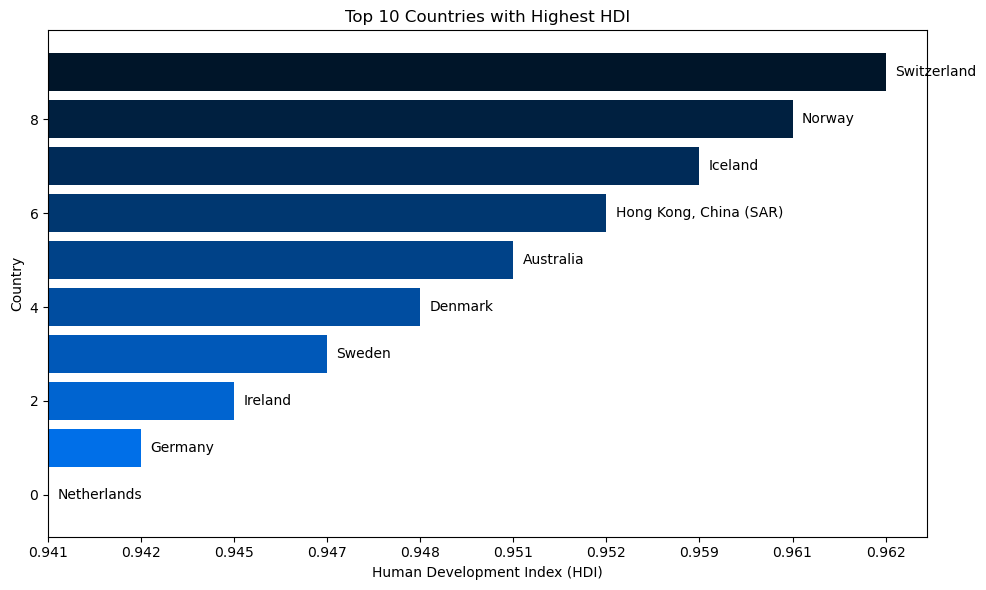

In [9]:
# Defining the range of blue colors for the ombre effect
start_color = '#007AFF'  # Light blue
end_color = '#001529'    # Dark blue
num_bars = len(top_10)
colors = mcolors.LinearSegmentedColormap.from_list("", [start_color, end_color])(np.linspace(0, 1, num_bars))

# Reversing the order of the top_10 DataFrame to get a correct axis numbering
top_10_reversed = top_10.iloc[::-1]

# Creating a horizontal bar plot to visualize the HDI of top 10 countries
plt.figure(figsize=(10, 6))
bars = plt.barh(np.arange(num_bars), top_10_reversed['Human Development Index (HDI) '], color=colors)
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest HDI')

# Adding country labels to the bars
for i, bar in enumerate(bars):
    country = top_10_reversed['Country'].iloc[i]
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, country, va='center')

plt.tight_layout()
plt.show()


Here, we can visualize the Human Development Index (HDI) of the top 10 countries using a horizontal bar plot, with a color gradient from light blue (country with lowest HDI, which is Netherlands) to dark blue (country with highest HDI, which is Switzerland).

Each bar corresponds to a country, and its length represents the HDI value.

The country names are displayed as labels next to their respective bars.

# Which country has the highest HDI and which one has the lowest?

In [10]:
# Sorting the dataset in descending order
sorted_hdi = HDI.sort_values(by='Human Development Index (HDI) ', ascending=False)

# Getting the country with the highest HDI
highest_hdi_country = sorted_hdi.iloc[0]['Country']

# Getting the country with the lowest HDI
lowest_hdi_country = sorted_hdi.iloc[-1]['Country']

# Printing the countries with the Highest and lowest HDI
print("Country with the highest HDI:", highest_hdi_country)
print("Country with the lowest HDI:", lowest_hdi_country)


Country with the highest HDI: Switzerland
Country with the lowest HDI: Somalia


As seen previously too, Switzerland has the highest HDI among the countries in the dataset, while Somalia has the lowest HDI. The code allows us identify the countries with the extreme HDI values in our dataset.

# How are countries distributed across different Human Development Index (HDI) categories?

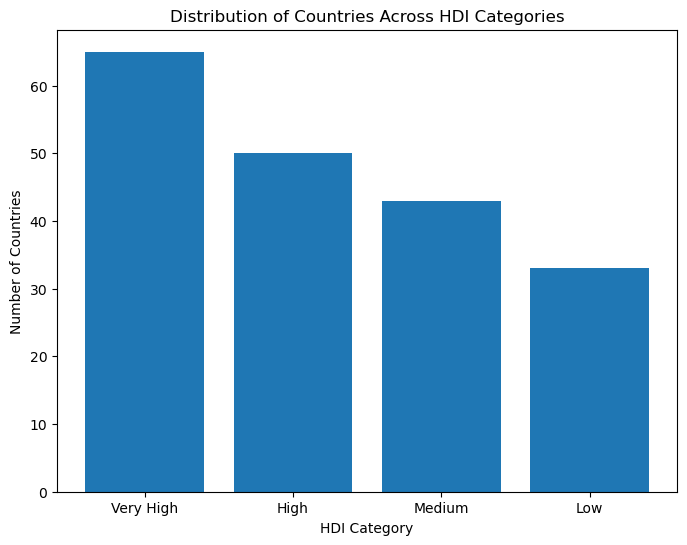

In [11]:
# Converting the HDI column to numeric type
HDI['Human Development Index (HDI) '] = pd.to_numeric(HDI['Human Development Index (HDI) '], errors='coerce')

# Defining the HDI categories and corresponding values
categories = {
    'Very High': 0.8,
    'High': 0.7,
    'Medium': 0.55,
    'Low': 0.0
}

# Categorizing countries based on HDI values
HDI['Category'] = pd.cut(HDI['Human Development Index (HDI) '], bins=[-1, categories['Medium'], categories['High'], categories['Very High'], 1], labels=['Low', 'Medium', 'High', 'Very High'])

# Grouping countries by category and calculating count
category_counts = HDI['Category'].value_counts()

# Ploting the distribution
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('HDI Category')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries Across HDI Categories')
plt.show()



The result we get is a bar plot that shows the distribution of countries across HDI categories. The x-axis represents the HDI categories, which are 'Low', 'Medium', 'High', and 'Very High'. The y-axis represents the number of countries in each category.

The 'Very High' category has the highest number of countries (around 65 countries), followed by the 'High' category ( 50 countries).

The 'Medium'(around 45 countries ) and 'Low' (around 35 countries) categories have a relatively lower number of countries compared to the former.

This distribution indicates that a significant number of countries have HDI values falling in the 'Very High' and 'High' categories, emphasizing the prevalence of countries with higher human development levels while acknowledging the presence of countries with lower development levels as well.

#  What is the pairwise correlation between different indicators of human development (such as HDI rank, Human Development Index and Life Expectancy at Birth)?

<Axes: >

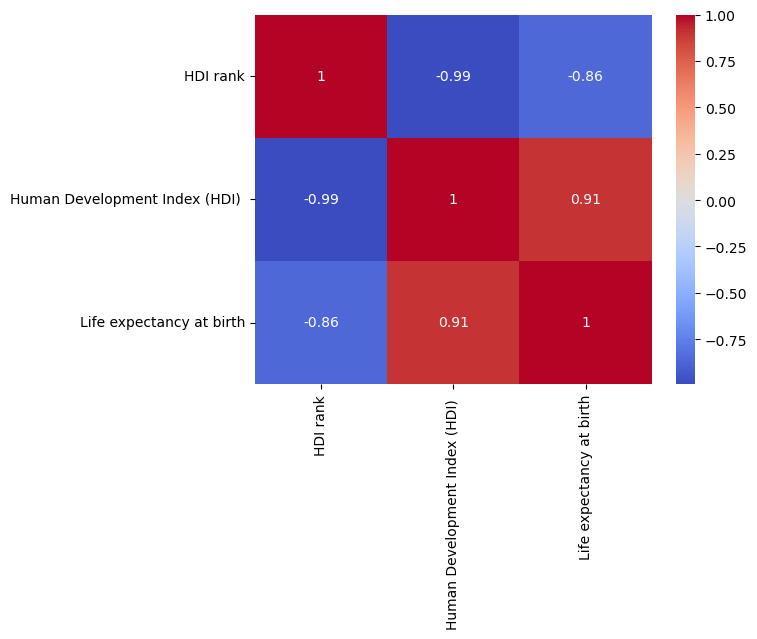

In [12]:
#pairwise correlation
hdi_corr = HDI.corr(numeric_only=True)

# Any NaN/non-numeric data=not taken into consideration 
sns.heatmap(hdi_corr,annot=True,cmap='coolwarm')

By examining the heatmap, we can identify that:

1. The heatmap uses a color scale to indicate the strength and direction of the correlations. The color range goes from cool colors (e.g., blue) for negative correlations to warm colors (e.g., red) for positive correlations.

2. The correlation matrix is symmetric, with the same values reflected across the diagonal.

3. Each cell in the heatmap represents the correlation between two indicators. The color and intensity of the cell indicate the strength of the correlation.
(For example, there is a strong positive correlation between life expectancy at birth and the human development index (HDI), indicating that higher life expectancy tends to be associated with higher HDI. )

4. Positive correlations (closer to red) indicate that as one indicator increases, the other tends to increase as well. Negative correlations (closer to blue) indicate that as one indicator increases, the other tends to decrease.
(For example,there is a strong negative correlation between the human development index (HDI) and HDI rank, indicating that HDI tends to be associated with lower HDI rank.)

5. The values range from -1 to 1, where -1 represents a perfect negative correlation, 1 represents a perfect positive correlation, and 0 represents no correlation.

6. The diagonal cells are always 1 since they represent the correlation of an indicator with itself.

In [13]:
# Calculating the correlation matrix of the numeric columns in the HDI dataset
correlation_matrix = HDI.corr(numeric_only=True)

# Printing the correlation matrix
print(correlation_matrix)

                                HDI rank  Human Development Index (HDI)   \
HDI rank                        1.000000                       -0.992091   
Human Development Index (HDI)  -0.992091                        1.000000   
Life expectancy at birth       -0.860402                        0.905833   

                                Life expectancy at birth  
HDI rank                                       -0.860402  
Human Development Index (HDI)                   0.905833  
Life expectancy at birth                        1.000000  


To explain the relationship we can take into consideration following examples:

The correlation coefficient between HDI rank and HDI is approximately -0.992, indicating a strong negative correlation, so as the HDI rank increases (higher rank means lower development),the HDI value decreases.

The correlation coefficient between HDI and Life expectancy at birth is approximately 0.906.
This suggests a strong positive correlation, indicating that as the HDI increases, there is a tendency for life expectancy at birth to increase as well.

The correlation coefficient between Life expectancy at birth and HDI rank is approximately -0.860.
This implies a strong negative correlation, meaning that as the HDI rank increases (lower development), life expectancy at birth tends to decrease.

# How does the Human Development Index (HDI) vary with respect to HDI rank?

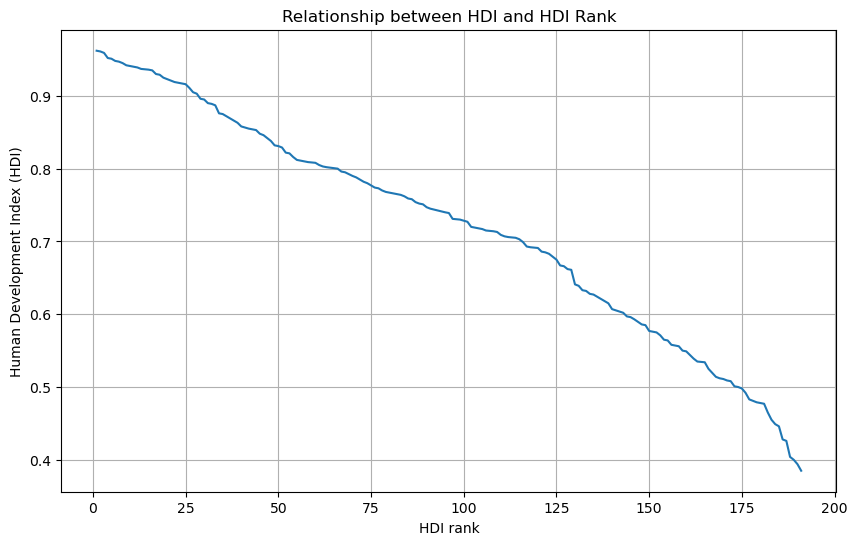

In [14]:
# Sorting in ascending order
HDI_sorted = HDI.sort_values('HDI rank')

# Creating a line plot of HDI and HDI Rank
plt.figure(figsize=(10, 6))
plt.plot(HDI_sorted['HDI rank'], HDI_sorted['Human Development Index (HDI) '])
plt.xlabel('HDI rank')
plt.ylabel('Human Development Index (HDI)')
plt.title('Relationship between HDI and HDI Rank')
plt.grid(True)
plt.show()


The x-axis represents the HDI rank, which is a measure of the country's position in terms of human development, with a lower rank indicating higher human development. The y-axis represents the HDI, which is a composite index that measures the overall human development of a country.

The line plot shows how the HDI varies with respect to HDI rank. As we also noticed on the correlation heatmap and matrix, the relationship between HDI and HDI rank is negative. As the HDI rank increases, indicating a lower position in human development, the HDI value decreases.

The plot provides a visual representation of how countries are distributed in terms of their human development, with countries at higher ranks having higher HDI values and thus higher levels of human development. The downward trend in the line suggests that there is generally a decrease in human development as we move towards higher HDI ranks.

# How does life expectancy affect the overall HDI?

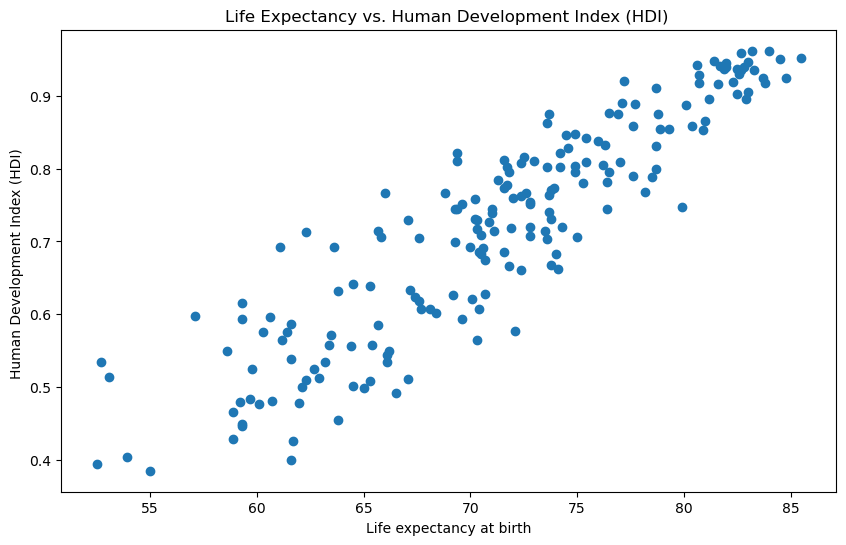

In [15]:
# Plotting the scatter plot of Life Expectancy vs. HDI
plt.figure(figsize=(10, 6))
plt.scatter(HDI['Life expectancy at birth'], HDI['Human Development Index (HDI) '])
plt.xlabel('Life expectancy at birth')
plt.ylabel('Human Development Index (HDI) ')
plt.title('Life Expectancy vs. Human Development Index (HDI) ')
plt.show()

The code above plots a scatter plot that visualizes the relationship between life expectancy at birth and the Human Development Index (HDI).

The output is a scatter plot where each data point represents a country. The x-axis represents the life expectancy at birth, which is a measure of the average number of years a newborn is expected to live. The y-axis represents the Human Development Index (HDI), which is a composite index that measures the overall development level of a country.

Here, we can observe the following:

1. There is a positive relationship between life expectancy at birth and the Human Development Index (HDI), as we obtained from the results of the correlation matrix as well. As life expectancy increases, the HDI tends to increase as well.

2. The scatter plot shows a general upward trend, indicating that countries with higher life expectancy tend to have higher HDI values.

3. There is some variation in the data, and not all countries follow the exact same pattern. There are countries with relatively lower life expectancy but still have higher HDI values, and vice versa.

# How does the distribution of HDI levels vary among the top 5 countries with a mean years of schooling higher than 10?



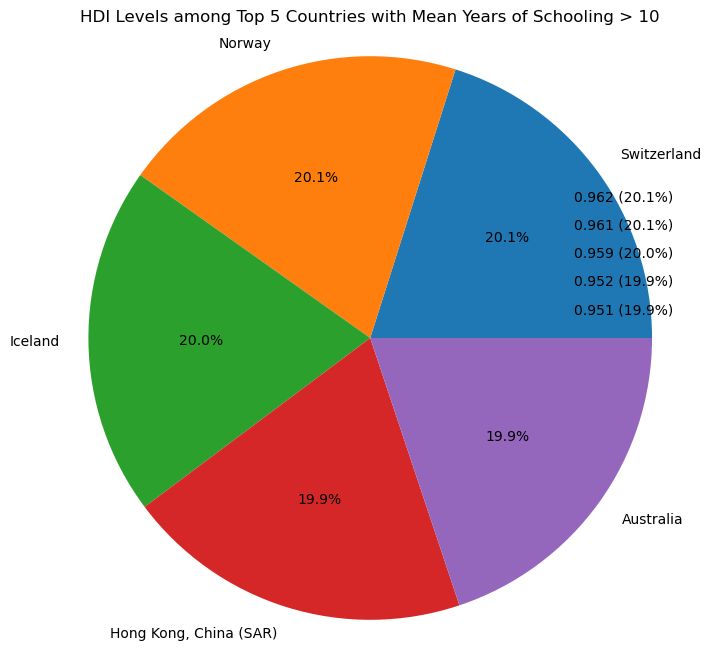

In [16]:
# Converting 'Human Development Index (HDI)' column to numeric type
HDI['Human Development Index (HDI) '] = pd.to_numeric(HDI['Human Development Index (HDI) '], errors='coerce')

# Converting 'Mean years of schooling' column to numeric type
HDI['Mean years of schooling'] = pd.to_numeric(HDI['Mean years of schooling'], errors='coerce')

# Filtering countries with mean years of schooling higher than 10
filtered_countries = HDI[HDI['Mean years of schooling'] > 10]

# Sorting the filtered countries by HDI in descending order and select the top 5
top_countries = filtered_countries.nlargest(5, 'Human Development Index (HDI) ')

# Creating a pie chart of HDI levels for the top 5 countries
plt.figure(figsize=(8, 8))
plt.pie(top_countries['Human Development Index (HDI) '], labels=top_countries['Country'], autopct='%1.1f%%')
plt.title('HDI Levels among Top 5 Countries with Mean Years of Schooling > 10')
plt.axis('equal')

# Adding actual percentages of HDI levels' contribution, on the pie chart
total = sum(top_countries['Human Development Index (HDI) '])
for i, percentage in enumerate(top_countries['Human Development Index (HDI) ']):
    percentage_label = f"{percentage} ({(percentage/total)*100:.1f}%)"
    plt.text(0.9, 0.5-i*0.1, percentage_label, ha='center', va='center')

plt.show()


Each slice of the pie chart represents a country, and its size corresponds to the proportion of the Human Development Index (HDI) within the top 5 countries, with a mean years of schooling higher than 10.

Although all selected countries have high HDI levels, the pie chart illustrates that there are still variations in the HDI values among them if we take into consideration education, therefore we can still gain valuable insight.

The labels on each slice indicate the country's name, and the percentage value represents the relative contribution of the HDI level of that country within the top 5. For example, "0.962 and 0.961 (20.1%)" means that the country's HDI level is 0.962 and 0.961, and it contributes 20.1% to the total HDI levels among the selected countries.

Same thing goes for: "0.959 (20.0%)" means that the country's HDI level is 0.959, and it contributes 20.0% to the total HDI levels among the selected countries and "0.952 and 0.951 (19.9%)" means that the country's HDI level is 0.952 and 0.951, and it contributes 19.9% to the total HDI levels among the selected countries.

Our results show that Norway and Switzerland are in the lead with a level of 20.1% HDI, followed by Iceland, with 20% and last two being China and Australia with HDI percentage of 19.9%.




#  How do life expectancy at birth, expected years of schooling, mean years of schooling, and gross national income per capita relate to the human development index (HDI)?

We have to perform regression analysis to examine the relationship between the independent variables (life expectancy at birth, expected years of schooling, mean years of schooling, and gross national income per capita) and the dependent variable (human development index). The aim is to assess the impact of these factors on the overall human development index.

Why OLS?:
The reason for choosing the OLS model for this data is that it is a commonly used and well-established method for estimating the linear relationship between variables. OLS assumes a linear relationship between the independent variables and the dependent variable and aims to minimize the sum of the squared differences between the observed and predicted values. It provides estimates of the coefficients, significance tests, and other statistical information that help assess the strength and significance of the relationships between the variables.

In [17]:
# Selecting the variables for the regression analysis
independent_vars = ['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita']
dependent_var = 'Human Development Index (HDI) '

# Creating a new DataFrame with the selected variables
data = HDI[independent_vars + [dependent_var]].copy()

# Converting object data types to numeric
data[independent_vars] = data[independent_vars].apply(pd.to_numeric, errors='coerce')
data[dependent_var] = pd.to_numeric(data[dependent_var], errors='coerce')

# Identifying rows with NaN values
nan_rows = data[data.isnull().any(axis=1)]

# Printing the rows with NaN values
print(nan_rows)

     Life expectancy at birth  Expected years of schooling  \
0                        84.0                         16.5   
1                        83.2                         18.2   
2                        82.7                         19.2   
3                        85.5                         17.3   
4                        84.5                         21.1   
..                        ...                          ...   
189                      52.5                          8.0   
191                      73.3                         10.8   
192                      85.9                          NaN   
193                      63.6                         11.7   
194                      55.3                          NaN   

     Mean years of schooling  Gross national income (GNI) per capita  \
0                       13.9                                     NaN   
1                       13.0                                     NaN   
2                       13.8           

Because of previous errors, first it is good practise to identify the rows with NaN values, as we have done above. Some values are missing in the dataset, particularly in the columns for gross national income (GNI) per capita, mean years of schooling, and some rows in the HDI column, so we will need to impute this values with their mean in the code below.

In [18]:
# Selecting the variables for the regression analysis
independent_vars = ['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita']
dependent_var = 'Human Development Index (HDI) '

# Creating a new DataFrame with the selected variables
data = HDI[independent_vars + [dependent_var]].copy()

# Converting object data types to numeric
data[independent_vars] = data[independent_vars].apply(pd.to_numeric, errors='coerce')
data[dependent_var] = pd.to_numeric(data[dependent_var], errors='coerce')

# Imputing missing values with mean
data.fillna(data.mean(), inplace=True)

# Spliting the data into independent and dependent variables
X = data[independent_vars]
y = data[dependent_var]

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Creating and fitting the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Printing the summary of the regression results
print(results.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Human Development Index (HDI)    R-squared:                       0.964
Model:                                        OLS   Adj. R-squared:                  0.963
Method:                             Least Squares   F-statistic:                     1267.
Date:                            Tue, 06 Jun 2023   Prob (F-statistic):          9.62e-136
Time:                                    20:34:24   Log-Likelihood:                 418.64
No. Observations:                             195   AIC:                            -827.3
Df Residuals:                                 190   BIC:                            -810.9
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                                             coef    std err          t      P>|t|      [0

The R-squared value of 0.964 indicates that approximately 96.4% of the variation in the dependent variable (Human Development Index) can be explained by the independent variables (life expectancy at birth, expected years of schooling, mean years of schooling, and gross national income per capita) included in the model.

The coefficients represent the estimated effect of each independent variable on the dependent variable, holding other variables constant. For example:
  1. Life expectancy at birth: For each additional unit increase in life expectancy at birth, the human development index is estimated to increase by 0.0069 units.
  2. Expected years of schooling: For each additional unit increase in expected years of schooling, the human development index is estimated to increase by 0.0147 units.
  3. Mean years of schooling: For each additional unit increase in mean years of schooling, the human development index is estimated to increase by 0.0204 units.
  4. Gross national income per capita: The coefficient for this variable is not statistically significant (p-value = 0.306), indicating that it does not have a significant linear relationship with the human development index in this model.

The p-values associated with each coefficient (P>|t|) indicate the statistical significance of the estimated coefficients. A p-value less than the significance level (commonly 0.05) suggests that the corresponding independent variable has a statistically significant effect on the dependent variable. In our case, all except GNI per capita have e p-value<0.05.

The standard errors of the coefficients (std err) provide an estimate of the variability in the coefficient estimates. Lower standard errors indicate more precise estimates (we have relatively low values, with standard errors<0.1).

Overall, the regression analysis indicates that life expectancy at birth, expected years of schooling, and mean years of schooling have a statistically significant positive relationship with the human development index. However, gross national income per capita does not have a significant linear relationship with the human development index in this model. The model explains a large portion of the variability in the human development index, but the presence of multicollinearity and departure from normality in the residuals should be taken into consideration when interpreting the results.


# What is the average difference between the GNI per capita rank and the HDI rank for each country?

In [19]:
# Converting 'GNI per capita rank minus HDI rank' column to numeric
HDI['GNI per capita rank minus HDI rank'] = HDI['GNI per capita rank minus HDI rank'].replace('..', np.nan).astype(float)

# Calculating the average values for each region
region_average_gni_rank_diff = HDI.groupby('Country')['GNI per capita rank minus HDI rank'].mean()

# Printing the average values for each region
print(region_average_gni_rank_diff)

Country
Afghanistan                           -2.0
Albania                               17.0
Algeria                               13.0
Andorra                              -19.0
Angola                               -14.0
                                      ... 
Venezuela (Bolivarian Republic of)    20.0
Viet Nam                               6.0
Yemen                                  1.0
Zambia                                 7.0
Zimbabwe                               9.0
Name: GNI per capita rank minus HDI rank, Length: 195, dtype: float64


The output shows the average difference between the GNI per capita rank and the HDI rank for each country. 

We can take as an example the first two: 

For Afghanistan, the average difference between the GNI per capita rank and the HDI rank is -2.0. This suggests that, on average, the GNI per capita rank is lower than the HDI rank by 2.0 positions.

For Albania, the average difference is 17.0, indicating that the GNI per capita rank is, on average, higher than the HDI rank by 17.0 positions.

The same interpretation applies to the other countries listed in the output.

A positive value suggests that a country's income level (GNI per capita) is relatively higher compared to its overall human development (HDI) rank. Conversely, a negative value indicates that the income level is relatively lower compared to the HDI rank. The differences in ranks can reflect the extent to which a country's economic development aligns with its overall human development.


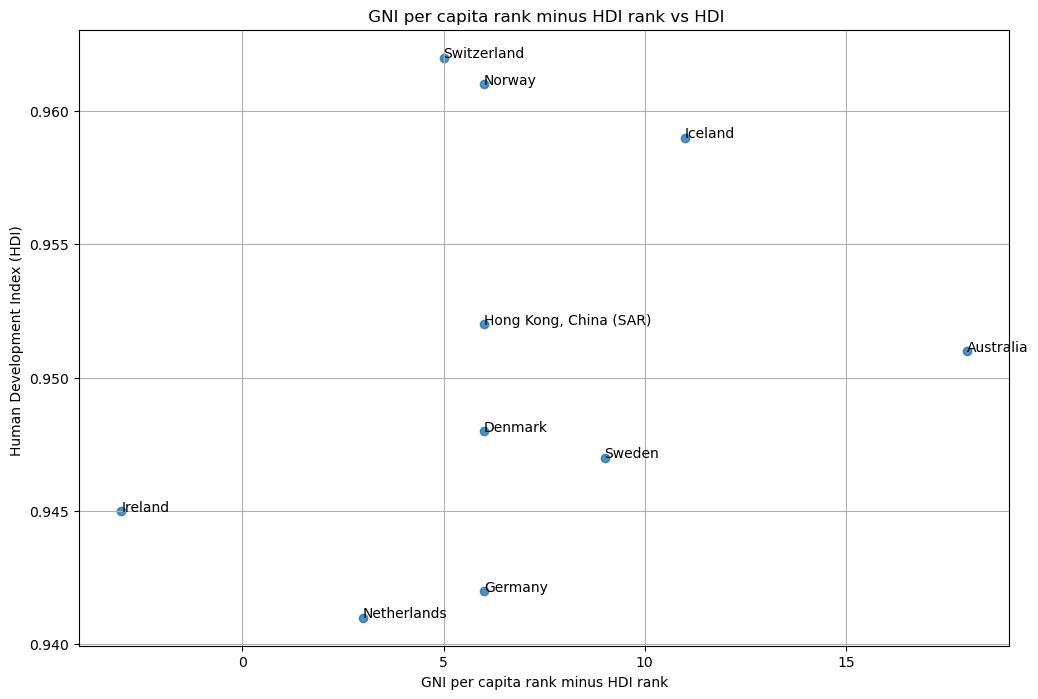

In [20]:
#Top 10 countries with the highest HDI values
top_10_countries = HDI.nlargest(10, 'Human Development Index (HDI) ')

# Ploting the alignment chart for the top 10 countries
plt.figure(figsize=(12, 8))
plt.scatter(top_10_countries['GNI per capita rank minus HDI rank'], top_10_countries['Human Development Index (HDI) '], alpha=0.8)

# Adding labels to each data point
for i, country in enumerate(top_10_countries['Country']):
    plt.annotate(country, (top_10_countries['GNI per capita rank minus HDI rank'].iloc[i], top_10_countries['Human Development Index (HDI) '].iloc[i]))

plt.xlabel('GNI per capita rank minus HDI rank')
plt.ylabel('Human Development Index (HDI) ')
plt.title(' GNI per capita rank minus HDI rank vs HDI')

plt.grid(True)
plt.show()



Here, we have generated an alignment chart that compares the GNI per capita rank minus HDI rank with the Human Development Index (HDI) for the top 10 countries with the highest HDI values.

The x-axis represents the GNI per capita rank minus HDI rank, which indicates the difference between the GNI per capita rank and the HDI rank for each country. A positive value indicates that the GNI per capita rank is higher than the HDI rank, while a negative value indicates the opposite.

The y-axis represents the HDI, which measures the overall human development of a country. Higher values indicate higher levels of human development.

Each data point on the chart represents a country. The position of the data point indicates its GNI per capita rank minus HDI rank on the x-axis and its HDI on the y-axis. For example, Switzerland haS a GNI per capita of 5 and HDI of higher than 0.960,  showing a high development level, relating to the fact that the rank difference is also positive.

The labels next to each data point represent the country name, allowing for easy identification.


# What are the top 10 countries with the highest predicted Human Development Index (HDI) based on life expectancy at birth, expected years of schooling, and mean years of schooling?

Why Linear Regression?:
Linear regression can perform well when the relationship between the predictors and the target variable is approximately linear and there is limited noise in the data. It can provide reasonable predictions, especially if the assumptions of linear regression are met.


Firstly, to avoid any errors, we can check the data types and null values on our dataframe, since we will be performing linear regression analysis.

In [21]:
print(HDI.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   HDI rank                                195 non-null    int64   
 1   Country                                 195 non-null    object  
 2   HUMAN DEVELOPMENT                       195 non-null    object  
 3   Human Development Index (HDI)           191 non-null    float64 
 4   Life expectancy at birth                195 non-null    float64 
 5   Expected years of schooling             195 non-null    object  
 6   Mean years of schooling                 191 non-null    float64 
 7   Gross national income (GNI) per capita  195 non-null    object  
 8   GNI per capita rank minus HDI rank      191 non-null    float64 
 9   HDI rank.1                              195 non-null    object  
 10  Category                                191 non-nu

The dataset consists of 195 entries or rows, representing different countries. It contains 11 columns or variables with various data types.

From the output, it can be observed that some columns have missing values (less than 195 non-null entries), which we will deal with below.

In [22]:
# Selecting the features (independent variables) for prediction
features =  ['Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling']   

# Selecting the target variable (HDI)
target = 'Human Development Index (HDI) '  

# Droping rows with non-numeric values in the selected features
HDI[features] = HDI[features].apply(pd.to_numeric, errors='coerce')
HDI.dropna(subset=features, inplace=True)

# Creating the feature matrix and target vector
X = HDI[features]
y = HDI[target]

# Imputing missing values with the mean of the respective feature
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X, y)

# Making predictions for HDI
predictions = model.predict(X)

# Adding the predicted HDI values to the dataset
HDI['Predicted HDI '] = predictions

# Sorting the dataset by predicted HDI in descending order
sorted_df = HDI.sort_values(by='Predicted HDI ', ascending=False)

# Selecting the top 10 countries with the highest predicted HDI
top_10_countries = sorted_df.head(10)

# Printing the top 10 countries
print(top_10_countries['Country'])




4                  Australia
2                    Iceland
13               New Zealand
6                     Sweden
10                   Finland
0                Switzerland
1                     Norway
12                   Belgium
5                    Denmark
3     Hong Kong, China (SAR)
Name: Country, dtype: object


The output shows the top 10 countries with the highest predicted Human Development Index (HDI) based on the performed linear regression analysis. The countries are listed in descending order:

From the results, we can see that Australia is predicted to have the highest HDI level in the future, followed by Iceland and New Zealand.

These countries are predicted to have the highest HDI values based on the given variables. The ranking is determined by the predicted levels of human development, which are estimated using the provided predictors.

It suggests that these countries excel in terms of life expectancy at birth, expected years of schooling, and mean years of schooling, indicating a high overall level of human development.



# References:

Intro_Data_science_Python Notebook, Jupyter, 2023
https://github.com/lucijakrusic/programming2SS23/blob/main/data_science/Intro_Data_science_Python.ipynb

Data-science2_EDA, Notebook, Jupyter, 2023
https://github.com/lucijakrusic/programming2SS23/blob/main/data_science/Data-science2_EDA.ipynb

Data-science3_ML, Notebook, Jupyter, 2023
https://github.com/lucijakrusic/programming2SS23/blob/main/data_science/Data-Science3_ML.ipynb

Human Development Index and Components, World Human Development Report 2021, https://www.kaggle.com/datasets/rajkumarpandey02/human-development-index-and-components

"Regional Disparities: A Comprehensive Analysis", Python · Human Development Index and Components https://www.kaggle.com/code/hanzla121/regional-disparities-a-comprehensive-analysis

Plotly Open Source Graphing Library for Python, 2023
https://plotly.com/python/

Project: Exploring World Human Development Index - HDI (Gapminder data), GitHub, bromero26, 2019
https://github.com/bromero26/human-development-index

